Name: Deep Pawar (A20545137)

Professor: Oleksandr Narykov

Institute: Illinois Institute of Technology

CSP 571: Data Preparation and Analysis

Fall 2024 - Assignment 3 : Programming Part 1

In [85]:
#Importing the required libraries
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

#Importing the heart disease dataset
heart_disease = fetch_ucirepo(id=45)

#Splitting dataset into features (X) and target (y)
X = heart_disease.data.features
y = heart_disease.data.targets
print(heart_disease.metadata)
print(heart_disease.variables)

#Cleaning the dataset by handling NaN values
X_cleaned = X.dropna()
y_cleaned = y.loc[X_cleaned.index]

print(f"\n---------------------------------------------------------------------------------")
print("\nX shape after Cleaning : ", X_cleaned.shape)
print("y shape after Cleaning : ", y_cleaned.shape)
print(f"\n---------------------------------------------------------------------------------")

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [86]:
# Value 1: >50% narrowing, Value 0: <50% narrowing
y = y.map(lambda x: 1 if x > 0 else 0)

Q.1 Build a decision tree model. Usage of packages is allowed. Run 10-fold crossvalidation. Report F1 score, accuracy, and AUROC for the model.

In [87]:
#Initializing the Decision Tree Classifier
dect_model = DecisionTreeClassifier(random_state=42)

#Defining scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

#Performing 10-fold cross-validation
results = cross_validate(dect_model, X, y, cv=10, scoring=scoring)

#Printing metric results for Decision Tree Classifier
print("----------------------------------------------------\n               Decision Tree Classifier \n----------------------------------------------------")
print(f"Accuracy : {results['test_accuracy'].mean():.4f}")
print(f"F1 Score : {results['test_f1'].mean():.4f}")
print(f"AUROC    : {results['test_roc_auc'].mean():.4f}")

----------------------------------------------------
               Decision Tree Classifier 
----------------------------------------------------
Accuracy : 0.7451
F1 Score : 0.7229
AUROC    : 0.7450


Q. 2 Use Random Forest model to make predictions. Run 10-fold cross-validation. Report. F1 score, accuracy, and AUROC for the model.

In [88]:
#Converting y to a 1D array
y = y.values.ravel()

#Initializing the Random Forest Classifier
rfc_model = RandomForestClassifier(random_state=42)

#Defining scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

#Perform 10-fold cross-validation
results = cross_validate(rfc_model, X, y, cv=10, scoring=scoring)

#Printing metric results for Random Forest Classifier
print("----------------------------------------------------\n           Random Forest Classifier\n----------------------------------------------------")
print(f"Accuracy : {results['test_accuracy'].mean():.4f}")
print(f"F1 Score : {results['test_f1'].mean():.4f}")
print(f"AUROC    : {results['test_roc_auc'].mean():.4f}")

----------------------------------------------------
           Random Forest Classifier
----------------------------------------------------
Accuracy : 0.8146
F1 Score : 0.7921
AUROC    : 0.8111


Q. 3 Use Boosting (e.g., LGBM, XGBoost, etc.) model to make predictions. Run 10-fold crossvalidation. Report F1 score, accuracy, and AUROC for the model.

In [89]:
#Initializing the XGBoost Classifier without 'use_label_encoder'
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

#Defining scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

#Performing 10-fold cross-validation
results = cross_validate(xgb_model, X, y, cv=10, scoring=scoring)

#Printing results for each metric
print("----------------------------------------------------\n                XGBoost Classifier\n----------------------------------------------------")
print(f"Accuracy : {results['test_accuracy'].mean():.4f}")
print(f"F1 Score : {results['test_f1'].mean():.4f}")
print(f"AUROC    : {results['test_roc_auc'].mean():.4f}")


----------------------------------------------------
                XGBoost Classifier
----------------------------------------------------
Accuracy : 0.7946
F1 Score : 0.7683
AUROC    : 0.7914


Q. 4 Compare three models performance

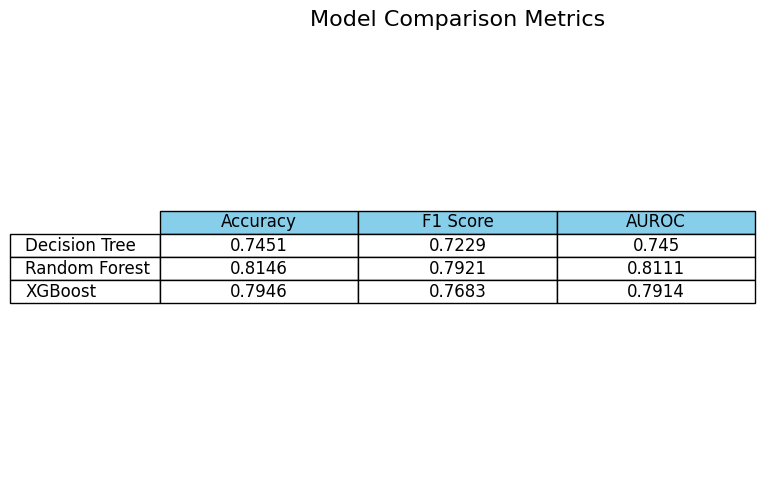

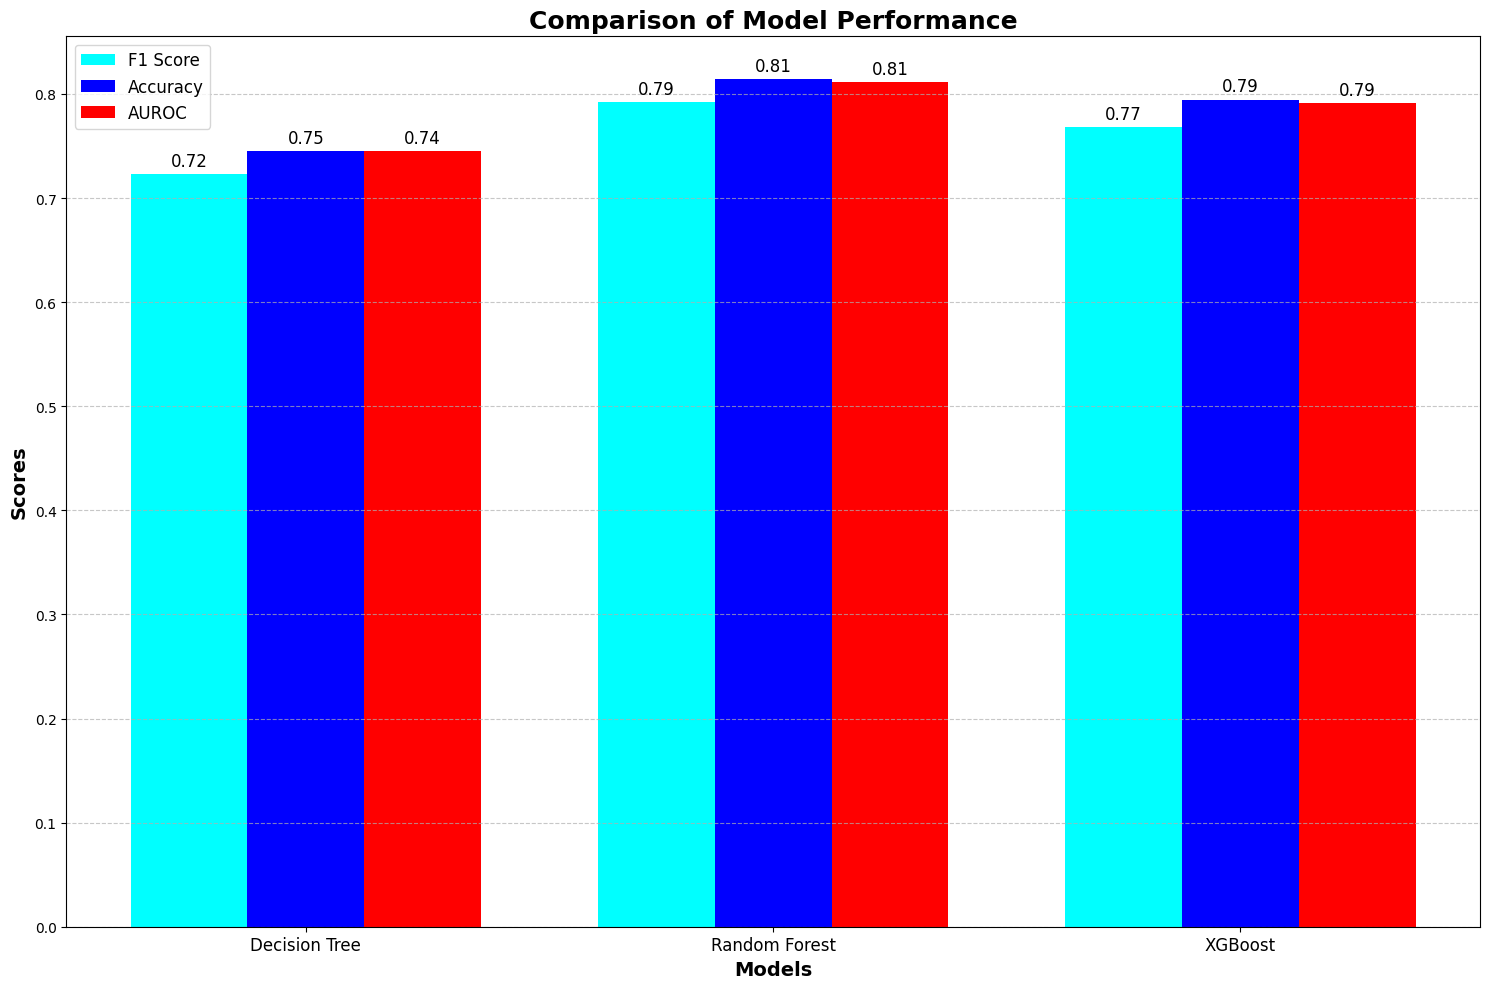

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
#Comparing Metrics values of all the models
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.7451, 0.8146, 0.7946]
f1_scores = [0.7229, 0.7921, 0.7683]
aurocs = [0.7450, 0.8111, 0.7914]


data = np.array([accuracies, f1_scores, aurocs]).T
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')
table = ax.table(cellText=data, colLabels=['Accuracy', 'F1 Score', 'AUROC'], rowLabels=models, loc='center', cellLoc='center', colColours=['skyblue']*3)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax.set_title('Model Comparison Metrics', fontsize=16)
plt.tight_layout()
plt.show()

print("\n")

import numpy as np
import matplotlib.pyplot as plt

# Example values for models, accuracies, f1_scores, and aurocs (assuming these are defined)
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.7451, 0.8146, 0.7946]
f1_scores = [0.7229, 0.7921, 0.7683]
aurocs = [0.7450, 0.8111, 0.7914]

# Creating a bar plot for comparison
x = np.arange(len(models))
width = 0.25
fig, ax = plt.subplots(figsize=(15, 10))
bars1 = ax.bar(x - width, f1_scores, width, label='F1 Score', color='cyan')
bars2 = ax.bar(x, accuracies, width, label='Accuracy', color='blue')
bars3 = ax.bar(x + width, aurocs, width, label='AUROC', color='red')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Model Performance', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
plt.tight_layout()
plt.show()



**Comparison analysis:**

---



**Accuracy :**

---



- Random Forest Classifier : 0.8146
- XGBoost Classifier       : 0.7946
- Decision Tree Classifier : 0.7451

Analysis: The Random Forest Classifier provides the highest accuracy, outperforming both XGBoost and Decision Tree classifiers. This suggests that Random Forest is better at correctly classifying the data overall.

---



**F1 Score :**

---


- Random Forest Classifier  : 0.7921
- XGBoost Classifier        : 0.7683
- Decision Tree Classifier  : 0.7229

Analysis: Random Forest also excels in F1 Score, which indicates that it has the best balance between precision and recall. This means it not only makes accurate predictions but also minimizes both false positives and false negatives. XGBoost is slightly behind, and the Decision Tree has the lowest F1 score, suggesting it might be more prone to misclassifications.

---



**AUROC :**

---


- Random Forest Classifier : 0.8111
- XGBoost Classifier       : 0.7914
- Decision Tree Classifier : 0.7450

Analysis: Random Forest has the highest AUROC, which indicates it is the most capable of distinguishing between positive and negative classes. A higher AUROC value suggests that the model is better at ranking predictions by probability and thus performs better in scenarios requiring class discrimination. XGBoost is again a strong competitor, though it lags slightly behind. The Decision Tree's AUROC is the lowest, which aligns with its lower accuracy and F1 score.

---



**Summary:**

---



- **Best Model Overall :** Random Forest Classifier leads in all three metrics (Accuracy, F1 Score, and AUROC), making it the best choice among the three for this dataset.

- **XGBoost Classifier :** While it doesn't top Random Forest, it still performs greatly across all metrics, indicating it could be a good alternative depending on the dataset's characteristics.

- **Decision Tree Classifier :** Although it has lower performance in comparison, it might still be useful for quick insights or as a baseline, especially if model interpretability is a key requirement.